In [1]:
import investpy
from datetime import date, datetime
from fredapi import Fred
import eurostat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\tsaiy\anaconda3\lib\site-packages\pandasdmx\remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  'to Session() have no effect', RuntimeWarning)


# 匯率、指數、公債、商品數據

In [2]:
#將datetime轉為string
from_date = '21/07/2015'
freq = 'Daily'
today = datetime.now().strftime("%d/%m/%Y")

#匯率
EUR = investpy.get_currency_cross_historical_data(currency_cross='EUR/USD', from_date = from_date,to_date = today, interval = freq)
GBP = investpy.get_currency_cross_historical_data(currency_cross='GBP/USD', from_date = from_date,to_date = today, interval = freq)
AUD = investpy.get_currency_cross_historical_data(currency_cross='AUD/USD', from_date = from_date,to_date = today, interval = freq)
#小心日圓方向
JPY = investpy.get_currency_cross_historical_data(currency_cross='USD/JPY', from_date = from_date,to_date = today, interval = freq)


#指數
SP500 = investpy.get_index_historical_data(index='S&P 500',country='united states', from_date = from_date,to_date = today, interval = freq)
VIX = investpy.get_index_historical_data(index='S&P 500 VIX',country='united states', from_date = from_date,to_date = today, interval = freq)
#注意道瓊指數已經被除以100了
DJI = investpy.get_index_historical_data(index='1/100 Dow Jones Industrial Average',country='united states', from_date= from_date,to_date = today, interval = freq)
NAS = investpy.get_index_historical_data(index='NASDAQ',country='united states', from_date = from_date,to_date = today, interval = freq)
FTSE = investpy.get_index_historical_data(index='FTSE 100',country='united kingdom', from_date = from_date,to_date = today, interval = freq)
DAX = investpy.get_index_historical_data(index='DAX',country='germany', from_date = from_date,to_date = today, interval = freq)
CAC = investpy.get_index_historical_data(index='CAC 40',country='france', from_date = from_date,to_date = today, interval = freq)
SHA = investpy.get_index_historical_data(index ='Shanghai', country='china', from_date = from_date,to_date = today, interval = freq)
SHE = investpy.get_index_historical_data(index ='SZSE Component', country='china', from_date = from_date,to_date = today, interval = freq)
HSI = investpy.get_index_historical_data(index ='Hang Seng', country='hong kong', from_date = from_date,to_date = today, interval = freq)
NK225 = investpy.get_index_historical_data(index ='Nikkei 225', country='japan', from_date = from_date,to_date = today, interval = freq)
EM = investpy.get_index_historical_data(index ='MSCI Emerging Markets', country='world', from_date = from_date,to_date = today, interval = freq)


#10年公債
USbond = investpy.bonds.get_bond_historical_data(bond = 'U.S. 10Y', from_date = from_date,to_date = today, interval = freq)
UKbond = investpy.bonds.get_bond_historical_data(bond = 'U.K. 10Y', from_date = from_date,to_date = today, interval = freq)
Gerbond = investpy.bonds.get_bond_historical_data(bond = 'Germany 10Y', from_date = from_date,to_date = today, interval = freq)
Frbond = investpy.bonds.get_bond_historical_data(bond = 'France 10Y', from_date = from_date,to_date = today, interval = freq)
JPbond = investpy.bonds.get_bond_historical_data(bond = 'Japan 10Y', from_date = from_date,to_date = today, interval = freq)
Canbond = investpy.bonds.get_bond_historical_data(bond = 'Canada 10Y', from_date = from_date,to_date = today, interval = freq)


#商品
Gold = investpy.get_commodity_historical_data(commodity='gold', from_date = from_date,to_date = today, interval = freq)
Silver = investpy.get_commodity_historical_data(commodity='silver', from_date = from_date,to_date = today, interval = freq)
Copper = investpy.get_commodity_historical_data(commodity='copper', from_date = from_date,to_date = today, interval = freq)
Soybean = investpy.get_commodity_historical_data(commodity='US Soybeans', from_date = from_date,to_date = today, interval = freq)
WTI = investpy.get_commodity_historical_data(commodity='Crude Oil WTI', from_date = from_date,to_date = today, interval = freq)
Brent = investpy.get_commodity_historical_data(commodity='Brent Oil', from_date = from_date,to_date = today, interval = freq)
Wheat = investpy.get_commodity_historical_data(commodity='US Wheat', from_date = from_date,to_date = today, interval = freq)
Corn = investpy.get_commodity_historical_data(commodity='US Corn', from_date = from_date,to_date = today, interval = freq)


C:\Users\tsaiy\anaconda3\lib\site-packages\investpy\commodities.py:523: Warning: Note that the displayed commodity data can differ depending on the country. If you want to retrieve copper data from either united states or united kingdom, specify the country parameter.
  warnings.warn(msg, Warning)


In [3]:
#計算各標的的報酬率
Asset = pd.DataFrame([])
Asset['GBP'] = (GBP.loc[:,'Close'] - GBP.loc[:,'Close'].shift(1))/GBP.loc[:,'Close'].shift(1) *100
Asset['EUR'] = (EUR.loc[:,'Close'] - EUR.loc[:,'Close'].shift(1))/EUR.loc[:,'Close'].shift(1) *100
Asset['AUD'] = (AUD.loc[:,'Close'] - AUD.loc[:,'Close'].shift(1))/AUD.loc[:,'Close'].shift(1) *100
Asset['JPY'] = (JPY.loc[:,'Close'] - JPY.loc[:,'Close'].shift(1))/JPY.loc[:,'Close'].shift(1) *100

Asset['SP500'] = (SP500.loc[:,'Close'] - SP500.loc[:,'Close'].shift(1))/SP500.loc[:,'Close'].shift(1) *100
Asset['VIX'] = (VIX.loc[:,'Close'] - VIX.loc[:,'Close'].shift(1))/VIX.loc[:,'Close'].shift(1) *100
Asset['DJI'] = (DJI.loc[:,'Close'] - DJI.loc[:,'Close'].shift(1))/DJI.loc[:,'Close'].shift(1) *100
Asset['NAS'] = (NAS.loc[:,'Close'] - NAS.loc[:,'Close'].shift(1))/NAS.loc[:,'Close'].shift(1) *100
Asset['FTSE'] = (FTSE.loc[:,'Close'] - FTSE.loc[:,'Close'].shift(1))/FTSE.loc[:,'Close'].shift(1) *100
Asset['DAX'] = (DAX.loc[:,'Close'] - DAX.loc[:,'Close'].shift(1))/DAX.loc[:,'Close'].shift(1) *100
Asset['CAC'] = (CAC.loc[:,'Close'] - CAC.loc[:,'Close'].shift(1))/CAC.loc[:,'Close'].shift(1) *100
Asset['SHA'] = (SHA.loc[:,'Close'] - SHA.loc[:,'Close'].shift(1))/SHA.loc[:,'Close'].shift(1) *100
Asset['SHE'] = (SHE.loc[:,'Close'] - SHE.loc[:,'Close'].shift(1))/SHE.loc[:,'Close'].shift(1) *100
Asset['HSI'] = (HSI.loc[:,'Close'] - HSI.loc[:,'Close'].shift(1))/HSI.loc[:,'Close'].shift(1) *100
Asset['NK225'] = (NK225.loc[:,'Close'] - NK225.loc[:,'Close'].shift(1))/NK225.loc[:,'Close'].shift(1) *100
Asset['EM'] = (EM.loc[:,'Close'] - EM.loc[:,'Close'].shift(1))/EM.loc[:,'Close'].shift(1) *100

Asset['USbond'] = USbond.loc[:,'Close'] - USbond.loc[:,'Close'].shift(1) *100
Asset['UKbond'] = UKbond.loc[:,'Close'] - UKbond.loc[:,'Close'].shift(1) *100
Asset['Gerbond'] = Gerbond.loc[:,'Close'] - Gerbond.loc[:,'Close'].shift(1) *100
Asset['Frbond'] = Frbond.loc[:,'Close'] - Frbond.loc[:,'Close'].shift(1) *100
Asset['JPbond'] = JPbond.loc[:,'Close'] - JPbond.loc[:,'Close'].shift(1) *100
Asset['Canbond'] = Canbond.loc[:,'Close'] - Canbond.loc[:,'Close'].shift(1) *100

Asset['Gold'] = (Gold.loc[:,'Close'] - Gold.loc[:,'Close'].shift(1))/Gold.loc[:,'Close'].shift(1) *100
Asset['Silver'] = (Silver.loc[:,'Close'] - Silver.loc[:,'Close'].shift(1))/Silver.loc[:,'Close'].shift(1) *100
Asset['Copper'] = (Copper.loc[:,'Close'] - Copper.loc[:,'Close'].shift(1))/Copper.loc[:,'Close'].shift(1) *100
Asset['Soybean'] = (Soybean.loc[:,'Close'] - Soybean.loc[:,'Close'].shift(1))/Soybean.loc[:,'Close'].shift(1) *100
Asset['WTI'] = (WTI.loc[:,'Close'] - WTI.loc[:,'Close'].shift(1))/WTI.loc[:,'Close'].shift(1) *100
Asset['Brent'] = (Brent.loc[:,'Close'] - Brent.loc[:,'Close'].shift(1))/Brent.loc[:,'Close'].shift(1) *100
Asset['Wheat'] = (Wheat.loc[:,'Close'] - Wheat.loc[:,'Close'].shift(1))/Wheat.loc[:,'Close'].shift(1) *100
Asset['Corn'] = (Corn.loc[:,'Close'] - Corn.loc[:,'Close'].shift(1))/Corn.loc[:,'Close'].shift(1) *100

#使用「最後觀察值法」來處理遺漏值，若有缺失值，則用前一筆來補
Asset = Asset.fillna(method='ffill')

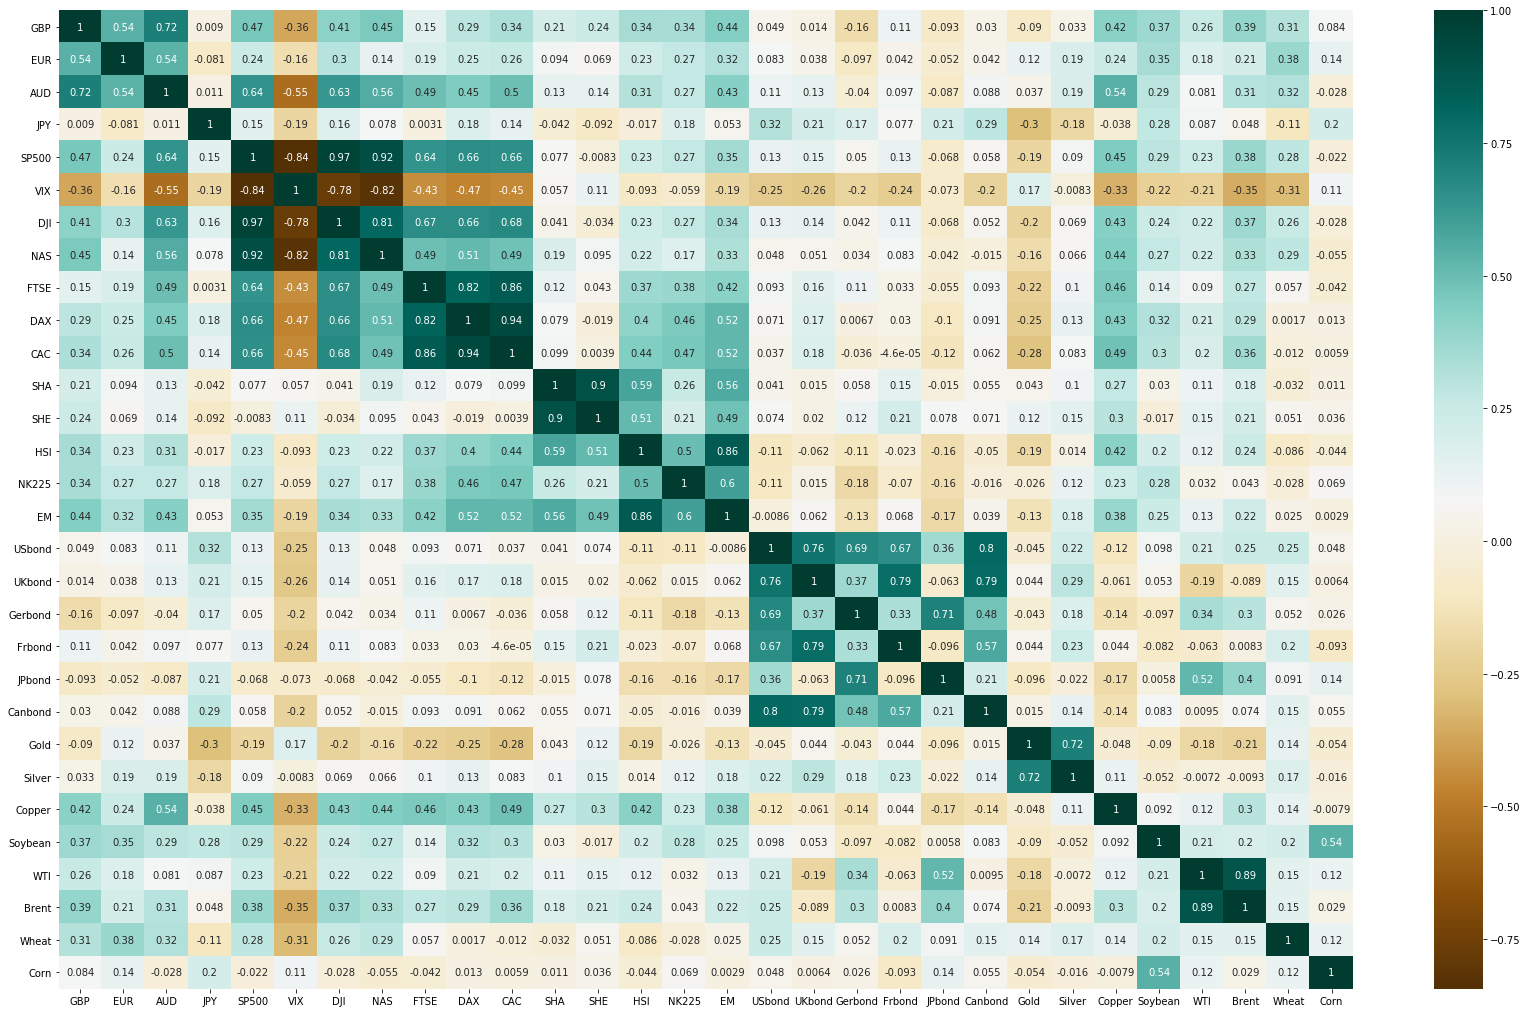

In [4]:
#觀察近60日各資產間的關聯性
plt.figure(figsize=(29,18))
sns.heatmap(Asset[1247:].corr(), annot=True, cmap='BrBG')
#plt.savefig('GBP_60.jpg')

In [5]:
def ShowColor(val):
    color = 'red' if abs(val) > 0.3 else 'green'
    return 'color:%s'%color


month = Asset[1287:].corr()['GBP'].rename('20d')
season = Asset[1247:].corr()['GBP'].rename('60d')
oneyear = Asset[1057:].corr()['GBP'].rename('1Year')
fiveyear = Asset.corr()['GBP'].rename('5Year')

test = pd.concat([month,season,oneyear,fiveyear] ,axis=1)

test.style.applymap(ShowColor)

,20d,60d,1Year,5Year
GBP,1.000000,1.000000,1.000000,1.000000
EUR,0.116009,0.542001,0.563457,0.537087
AUD,0.520648,0.716132,0.629653,0.471335
JPY,-0.319378,0.009040,-0.361474,-0.147456
SP500,0.471482,0.466762,0.145609,0.133583
VIX,-0.450644,-0.362029,-0.071552,-0.105166
DJI,0.172155,0.409977,0.158255,0.134022
NAS,0.610859,0.454590,0.102236,0.111453
FTSE,-0.314709,0.152313,0.170744,0.016739
DAX,-0.035415,0.289432,0.295782,0.172587


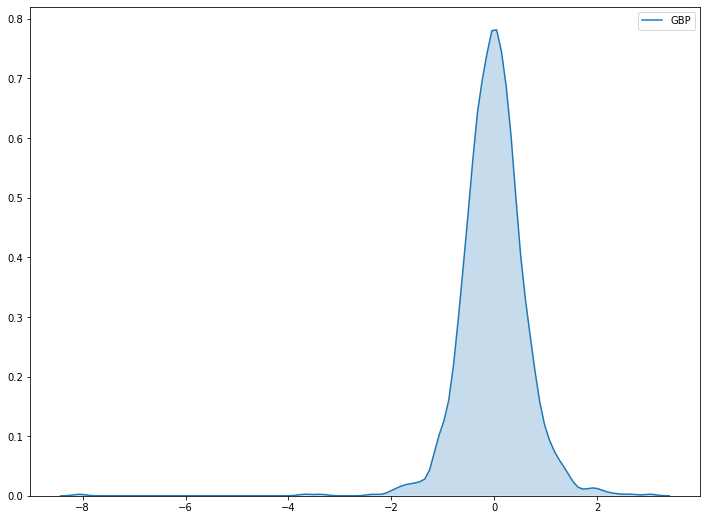

In [220]:
#下圖可知英鎊的每日報酬率最多是在0值，
plt.figure(figsize=(12,9))
sns.kdeplot(test['GBP'], shade=True)

In [78]:
#取得英鎊月資料
test2 = investpy.get_currency_cross_historical_data(currency_cross='GBP/USD', from_date = '01/07/2018',to_date = today, interval = 'Monthly')
test2.loc[:,'return'] = (test2.loc[:,'Close'] - test2.loc[:,'Close'].shift(1))/test2.loc[:,'Close'].shift(1) *100

test2.to_excel("GBP_monthly.xlsx")

In [5]:
#Read the table of contents of the main database as a dataframe
toc_df = eurostat.get_toc_df()

In [7]:
eurostat.subset_toc_df(toc_df, 'price')

,title,code,type,last update of data,last table structure change,data start,data end
26,Consumer prices,ei_cp,folder,,,,
27,Harmonised index of consumer prices - monthly...,ei_cphi_m,dataset,17.07.2020,17.07.2020,1996M01,2020M06
44,Service producer prices - quarterly data - ind...,ei_isppi_q,dataset,17.07.2020,17.07.2020,2017Q3,2020Q2
45,Service producer prices - quarterly data - gro...,ei_isppe_q,dataset,17.07.2020,17.07.2020,2017Q3,2020Q2
69,Housing price statistics,ei_hp,folder,,,,
...,...,...,...,...,...,...,...
8518,Gross value added - NACE Rev. 2: O-Q - current...,teina440_r2,table,20.07.2020,20.07.2020,2017Q2,2020Q1
8520,Gross value added - NACE Rev. 2: R-U - current...,teina444_r2,table,20.07.2020,20.07.2020,2017Q2,2020Q1
8544,Consumer prices,teieuro_cp,folder,,,,
8568,House price index (2015 = 100) - quarterly data,teicp270,table,08.07.2020,08.07.2020,2017Q2,2020Q1


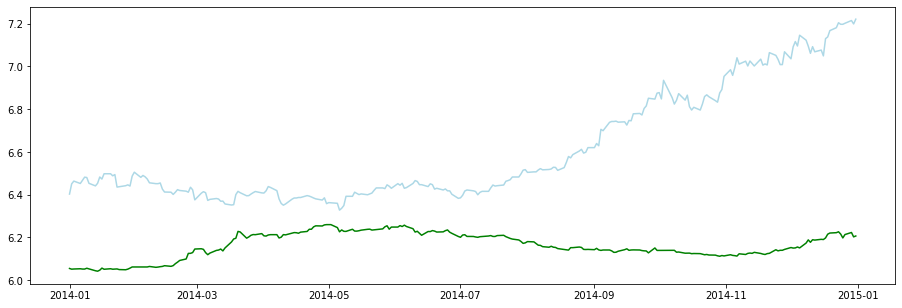

In [8]:
#from_date = '01/07/2007'
#freq = 'Daily'
#today = '01/02/2010'

#from_date = '01/01/2010'
#freq = 'Daily'
#today = '31/01/2014'

#from_date = '01/01/2014'
#freq = 'Daily'
#today = '01/02/2017'

#from_date = '01/02/2017'
#freq = 'Daily'
#today = '31/12/2018'

#from_date = '01/01/2014'
#freq = 'Daily'
#today = today = datetime.now().strftime("%d/%m/%Y")

from_date = '01/01/2014'
freq = 'Daily'
today = '31/12/2014'

#GBPEUR = investpy.get_currency_cross_historical_data(currency_cross='GBP/EUR', from_date = from_date,to_date = today, interval = freq)
#GBPUSD = investpy.get_currency_cross_historical_data(currency_cross='GBP/USD', from_date = from_date,to_date = today, interval = freq)
Dollar = investpy.get_index_historical_data(index='US Dollar Index',country='united states', from_date = from_date,to_date = today, interval = freq)
USDCHY = investpy.get_currency_cross_historical_data(currency_cross='USD/CNY', from_date = from_date,to_date = today, interval = freq)

#SP500 = investpy.get_index_historical_data(index='S&P 500',country='united states', from_date = from_date,to_date = today, interval = freq)



Dollar['Close'] = 0.08*Dollar['Close']
#SP500['Close'] = 0.01*SP500['Close']*4

plt.figure(figsize=(15.5,5.1))
plt.plot(Dollar['Close'],'#ADD8E6')
#plt.plot(SP500['Close'],'orange')
#plt.plot(GBPUSD['Close'],'orange') 
#plt.plot(GBPEUR['Close'],'g')
plt.plot(USDCHY['Close'],'g')
  

#plt.legend(["DXY", "GBPUSD","GBPEUR"], loc ="upper right") 
#plt.legend(["DXY","GBPUSD"], loc ="upper right") 

plt.show() 

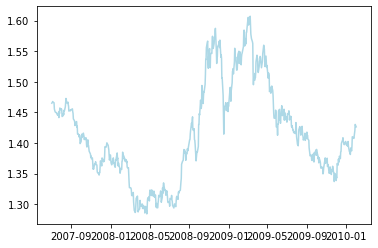

In [15]:
plt.plot(Dollar['Close'],'#ADD8E6') 